In [293]:
import numpy as np
from matplotlib import pyplot as plt

In [278]:
def range_evenly(start, stop, n: int):
    return np.linspace(start=start, stop=stop, num=n, dtype=np.longdouble)

def range_chebyshev(start, stop, n: int):
    return np.array([
        (start + stop) / 2 + (stop - start) / 2 * np.cos(((2*i-1)*np.pi)/(2*n)) for i in range(1, n+1)
    ], dtype=np.longdouble)

In [328]:
def fac(n):
    result = 1
    for i in range(2, n+1):
        result *= i

    return result

def hermite(xs: list[list]):
    def _poly(x):
        ps = [1]
        for fxs in xs:
            xi = fxs[0]
            for _ in fxs[1:]:
                p = (x-xi) * ps[-1]
                ps.append(p)

        n = sum([len(fxs) - 1 for fxs in xs]) + 1
        bs = []

        for fxs in xs:
            for _ in fxs[1:]:
                bs.append([fxs[0], fxs[1]])

        indexes = []
        for i, fxs in enumerate(xs):
            indexes.extend([i] * (len(fxs) - 1))

        for i in range(2, n-1):
            for j in range(i-1, n-1):
                index = indexes[j]
                derivs = xs[index][2:]
                no_derivs = len(derivs)

                val = bs[j][i-1] - bs[j-1][i-1]
                div = bs[j][0] - bs[j-i+1][0]

                if no_derivs >= i - 1 and indexes[j-1] == indexes[j] and div == 0:
                    bs[j].append(derivs[i-2]/fac(i-1))
                else:
                    bs[j].append(val/div)

        bs[-1].append((bs[-1][-1] - bs[-2][-1]) / (bs[-1][0] - bs[0][0]))

        result = 0

        for i in range(n-1):
            result += ps[i] * bs[i][-1]

        return result

    return _poly

In [279]:
def f_real(x):
    return np.exp(np.cos(x))

In [280]:
def df_real(x):
    return f_real(x) * -np.sin(x)

In [283]:
START, STOP = -4 * np.pi, 4 * np.pi

In [286]:
x_real = range_evenly(START, STOP, 500)
y_real = f_real(x_real)

In [352]:
def err(y):
    return max(abs(y-y_real))

def std_err(ys, k: int):
    s = sum([(y_r - y)**2 for y_r, y in zip(y_real, ys)])
    return 1/k * np.sqrt(s)

In [394]:
max_errors = []
std_errors = []

In [395]:
def m(n: int, k: int = 500):
    n_x_evenly = range_evenly(START, STOP, n)
    n_x_chebyshev = range_chebyshev(START, STOP, n)
    n_y_evenly = [f_real(x) for x in n_x_evenly]
    n_y_chebyshev = [f_real(x) for x in n_x_chebyshev]
    dx_evenly = [df_real(x) for x in n_x_evenly]
    dx_chebyshev = [df_real(x) for x in n_x_chebyshev]

    nodes_evenly = list(zip(n_x_evenly, n_y_evenly, dx_evenly))
    nodes_chebyshev = list(zip(n_x_chebyshev, n_y_chebyshev, dx_chebyshev))

    hermite_evenly = hermite(nodes_evenly)
    hermite_chebyshev = hermite(nodes_chebyshev)

    x = range_evenly(START, STOP, k)

    y_evenly = hermite_evenly(x)
    y_chebyshev = hermite_chebyshev(x)

    fig, axs = plt.subplots(2, figsize=(8, 6))
    fig.tight_layout(pad=5)

    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='y')

    axs[0].set_title('równoodległe')
    axs[0].plot(x, y_real)
    axs[0].plot(x, y_evenly)
    axs[0].scatter(n_x_evenly, n_y_evenly)

    axs[1].set_title('zera wielomianu Czebyszewa')
    axs[1].plot(x, y_real)
    axs[1].plot(x, y_chebyshev)
    axs[1].scatter(n_x_chebyshev, n_y_chebyshev)


    max_errors.append([n, err(y_evenly), err(y_chebyshev)])
    std_errors.append([n, std_err(y_evenly, k), std_err(y_chebyshev, k)])

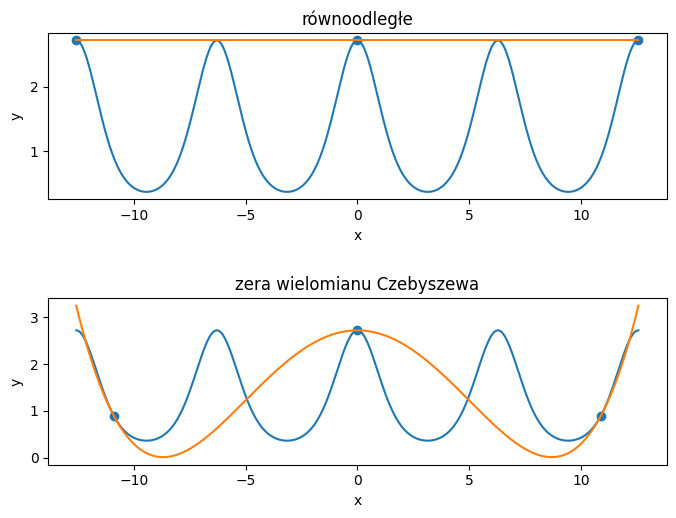

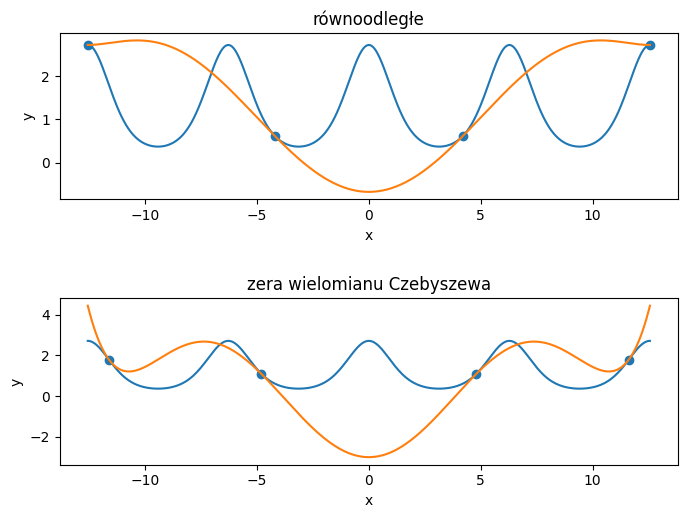

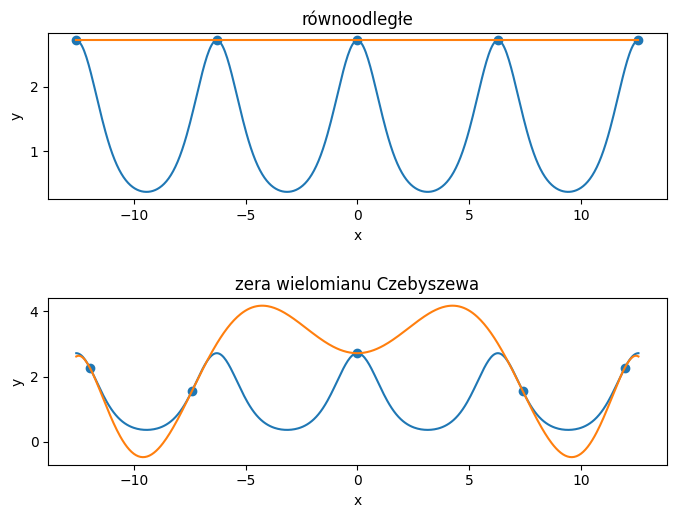

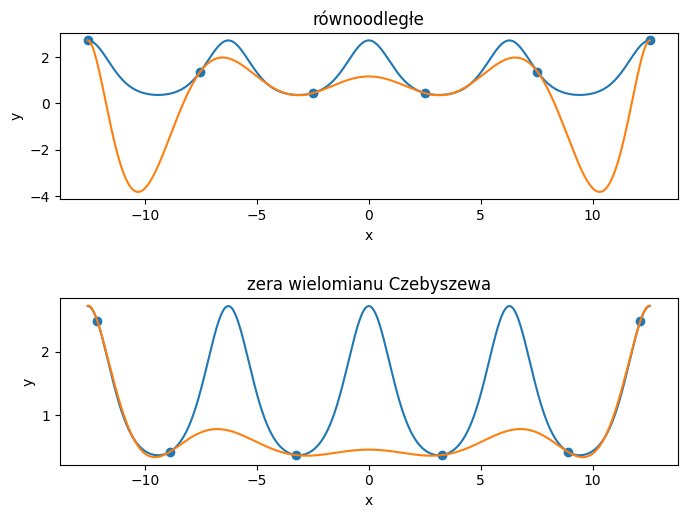

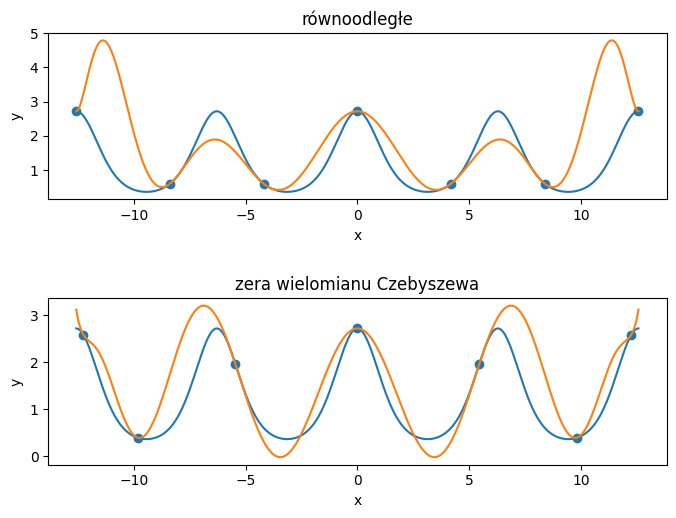

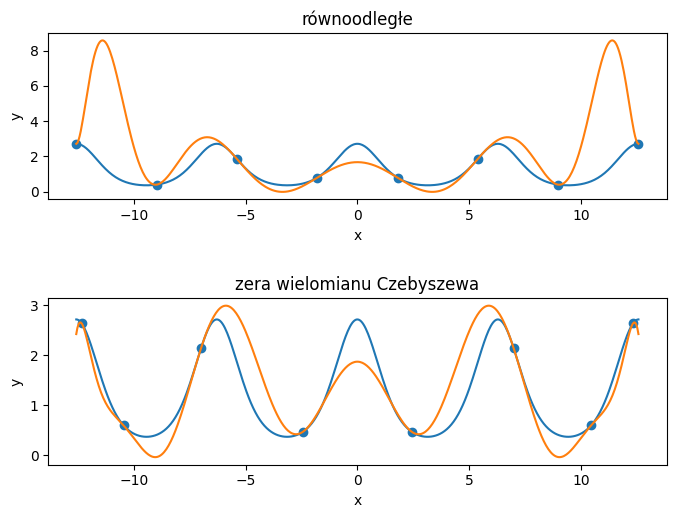

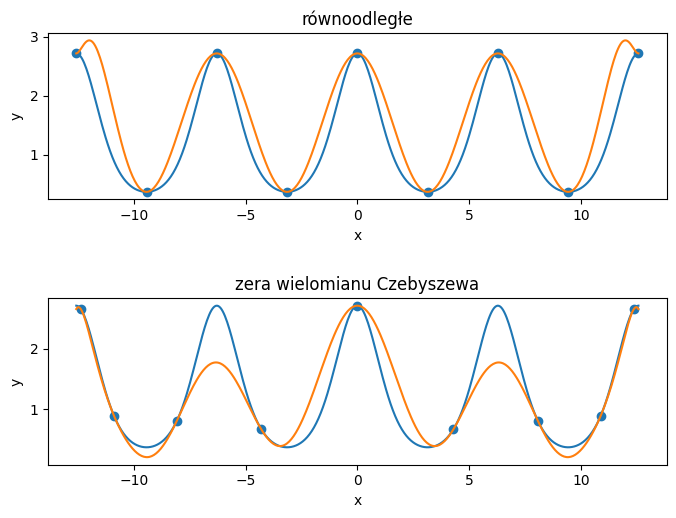

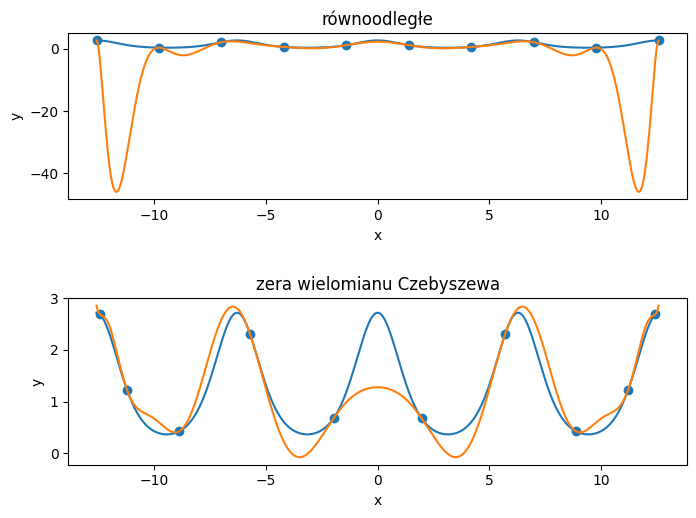

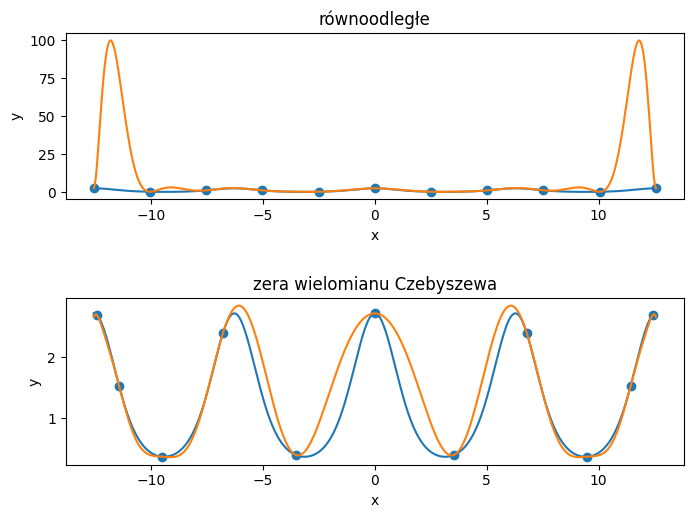

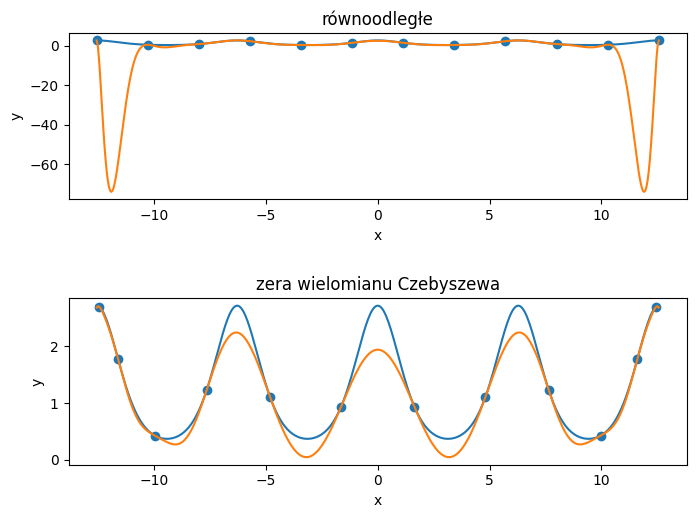

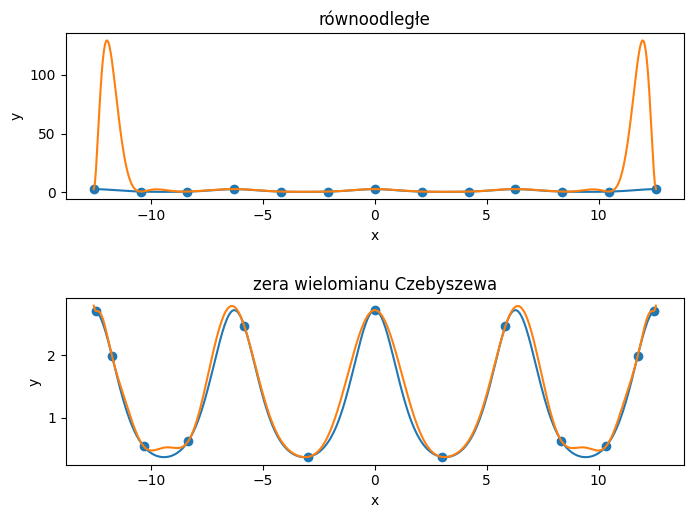

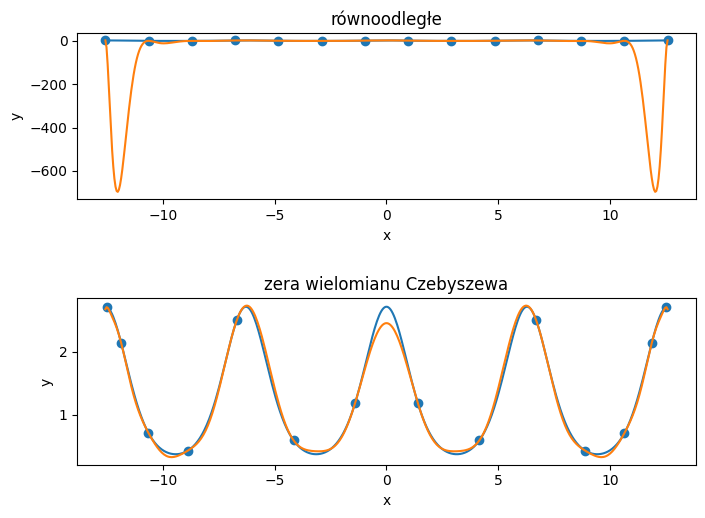

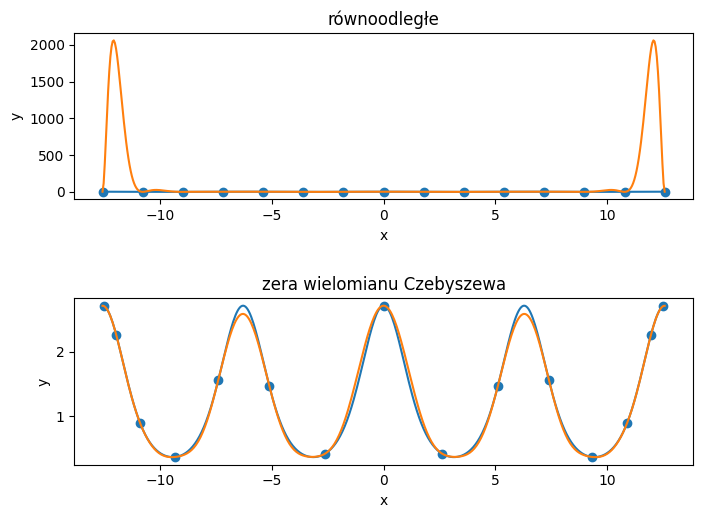

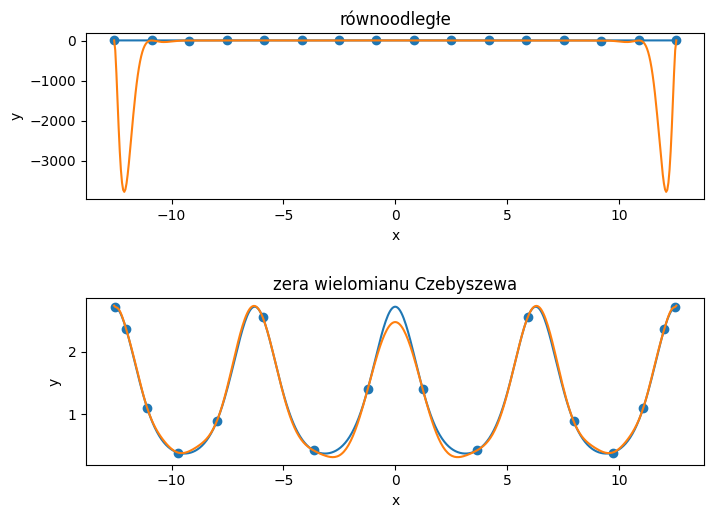

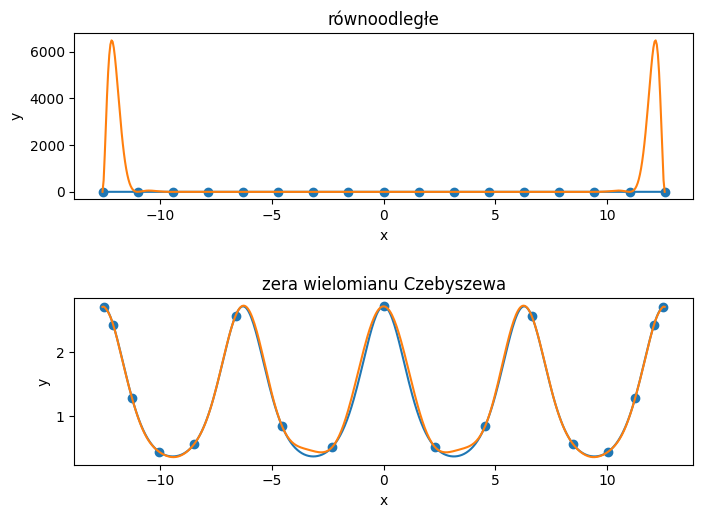

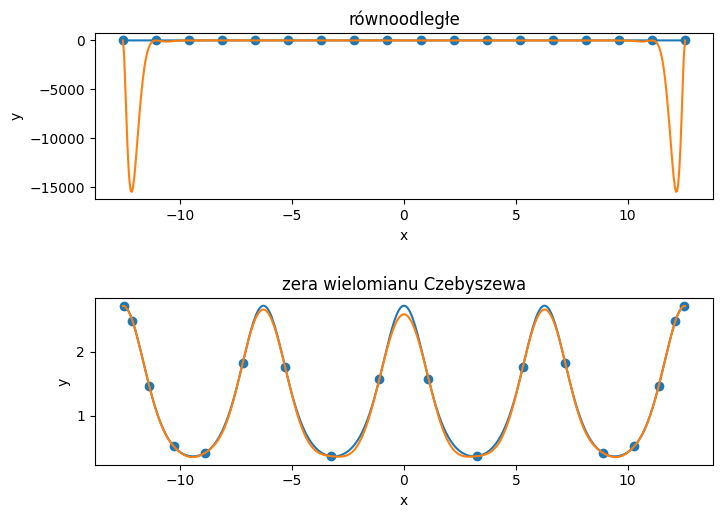

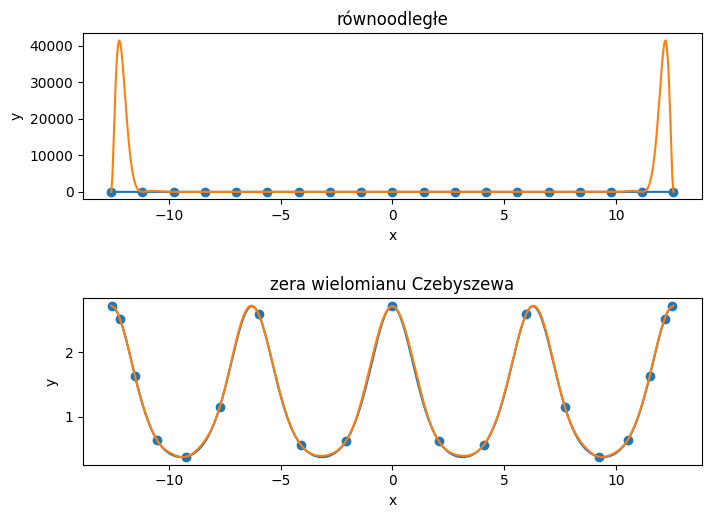

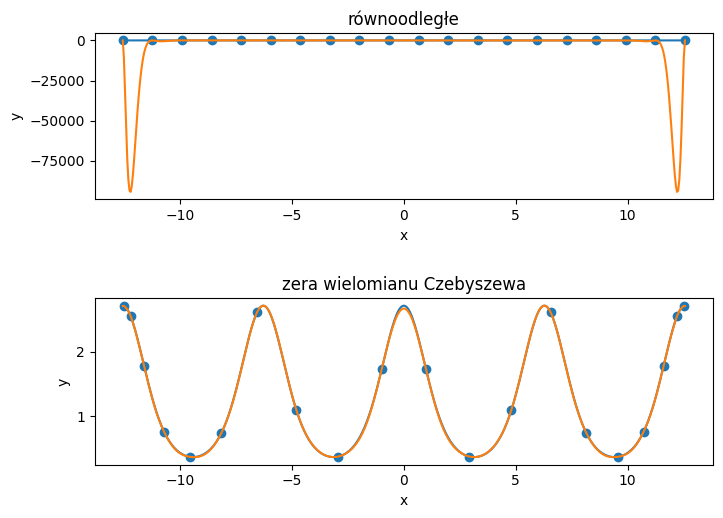

In [396]:
for i in range(3, 21):
    m(i)

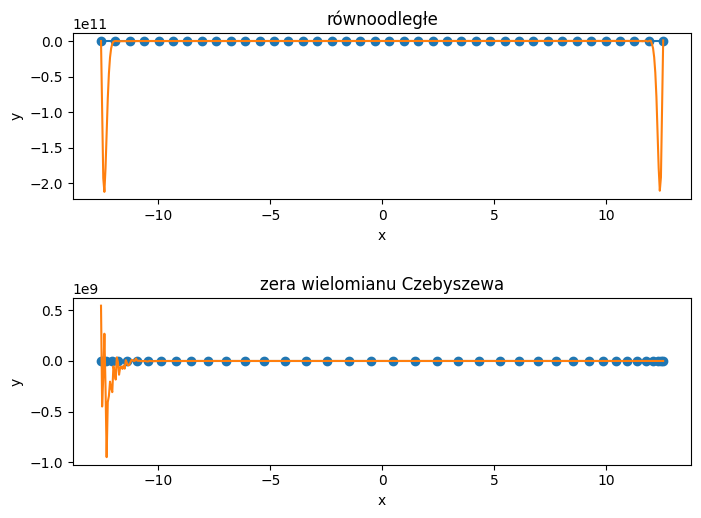

In [397]:
m(40)

In [398]:
print(*max_errors, sep="\n")

[3, 2.3503950964563660297, 2.120063719752942611]
[4, 3.3959441844742356523, 5.7189884141996309196]
[5, 2.350395096456365877, 3.6736940633968892505]
[6, 4.374212611400878561, 2.2610120710807437429]
[7, 3.5086022805505833323, 1.533359816009532473]
[8, 7.168771060830676827, 1.1692510235954992237]
[9, 1.0343940194306805182, 0.9429980554812204273]
[10, 47.823651341872591494, 1.4382080774291131546]
[11, 97.67391343758999077, 0.9037556207086990924]
[12, 76.308955383839561955, 0.7763427296346577842]
[13, 127.12803247561729285, 0.26689308531062122727]
[14, 699.44989231093107923, 0.2613474779905105422]
[15, 2059.4211548886058258, 0.17110383411458581122]
[16, 3784.5694209246213189, 0.24562599414513302089]
[17, 6472.9895425165125644, 0.1709520208373893857]
[18, 15498.450803161889791, 0.13374703229742026167]
[19, 41513.103282226706646, 0.061255044479617819773]
[20, 94267.44024114639686, 0.044779621711860218914]
[40, 212117979728.88845925, 949191187.13204091496]


In [399]:
print(*std_errors, sep="\n")

[3, 0.07456570895109912096, 0.050201088342689572066]
[4, 0.069416879542702199814, 0.092420311406175549655]
[5, 0.07456570895109918047, 0.08242838230723817652]
[6, 0.08009544796861945586, 0.040410950074445219015]
[7, 0.05538959377836887839, 0.026408924520921370497]
[8, 0.10463577678716787609, 0.020922808822307785959]
[9, 0.019447486581609471545, 0.016755261961066063772]
[10, 0.5852963466426873907, 0.01797804146056620138]
[11, 1.1141039503851230452, 0.015444337300885596672]
[12, 0.8144242047949305034, 0.010727982684235050885]
[13, 1.2960416200901020512, 0.0050153440182633854137]
[14, 6.837914733267808194, 0.002907634392192827635]
[15, 19.2486963504013252, 0.0026115537878661536737]
[16, 33.884536475698868077, 0.0026653632963138490603]
[17, 55.799282316655614774, 0.0023893613447619388231]
[18, 129.24769275549092479, 0.0016990787731160470907]
[19, 334.099488402894125, 0.00087380620530219704703]
[20, 736.56793244864300557, 0.00042186230634328286303]
[40, 1089469696.6226558188, 2927868.732973